### 상수항 결합 - Bias Augmentation

In [1]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [2]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

### Numpy를 이용한 선형 회귀분석

`make_regression` 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.


In [4]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)

X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [6]:
# 우리가 준 bias 값은 100이고 make_regression 명령이 생성한 모수 값은 다음과 같다.
w

array(86.44794301)

따라서 $x와 y$는 다음과 같은 관계를 가진다.

$y = 100 + 86.44794301x + \epsilon$

In [8]:
# 위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다.
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

즉, 최소자승법으로 구한 선형회귀모형은 다음과 같다.

$\hat{y} = 99.79150869 + 86.96171201x$

## 이 결과에서 알 수 있는 것은 선형 회귀를 통해 구한 가중치 벡터는 `정답과 비슷하지만 똑같지는 않다`는 점이다.

위 식에 여러가지 x값을 대입하여 $\hat{y}$을 구해본 결과를 원래 데이터와 비교

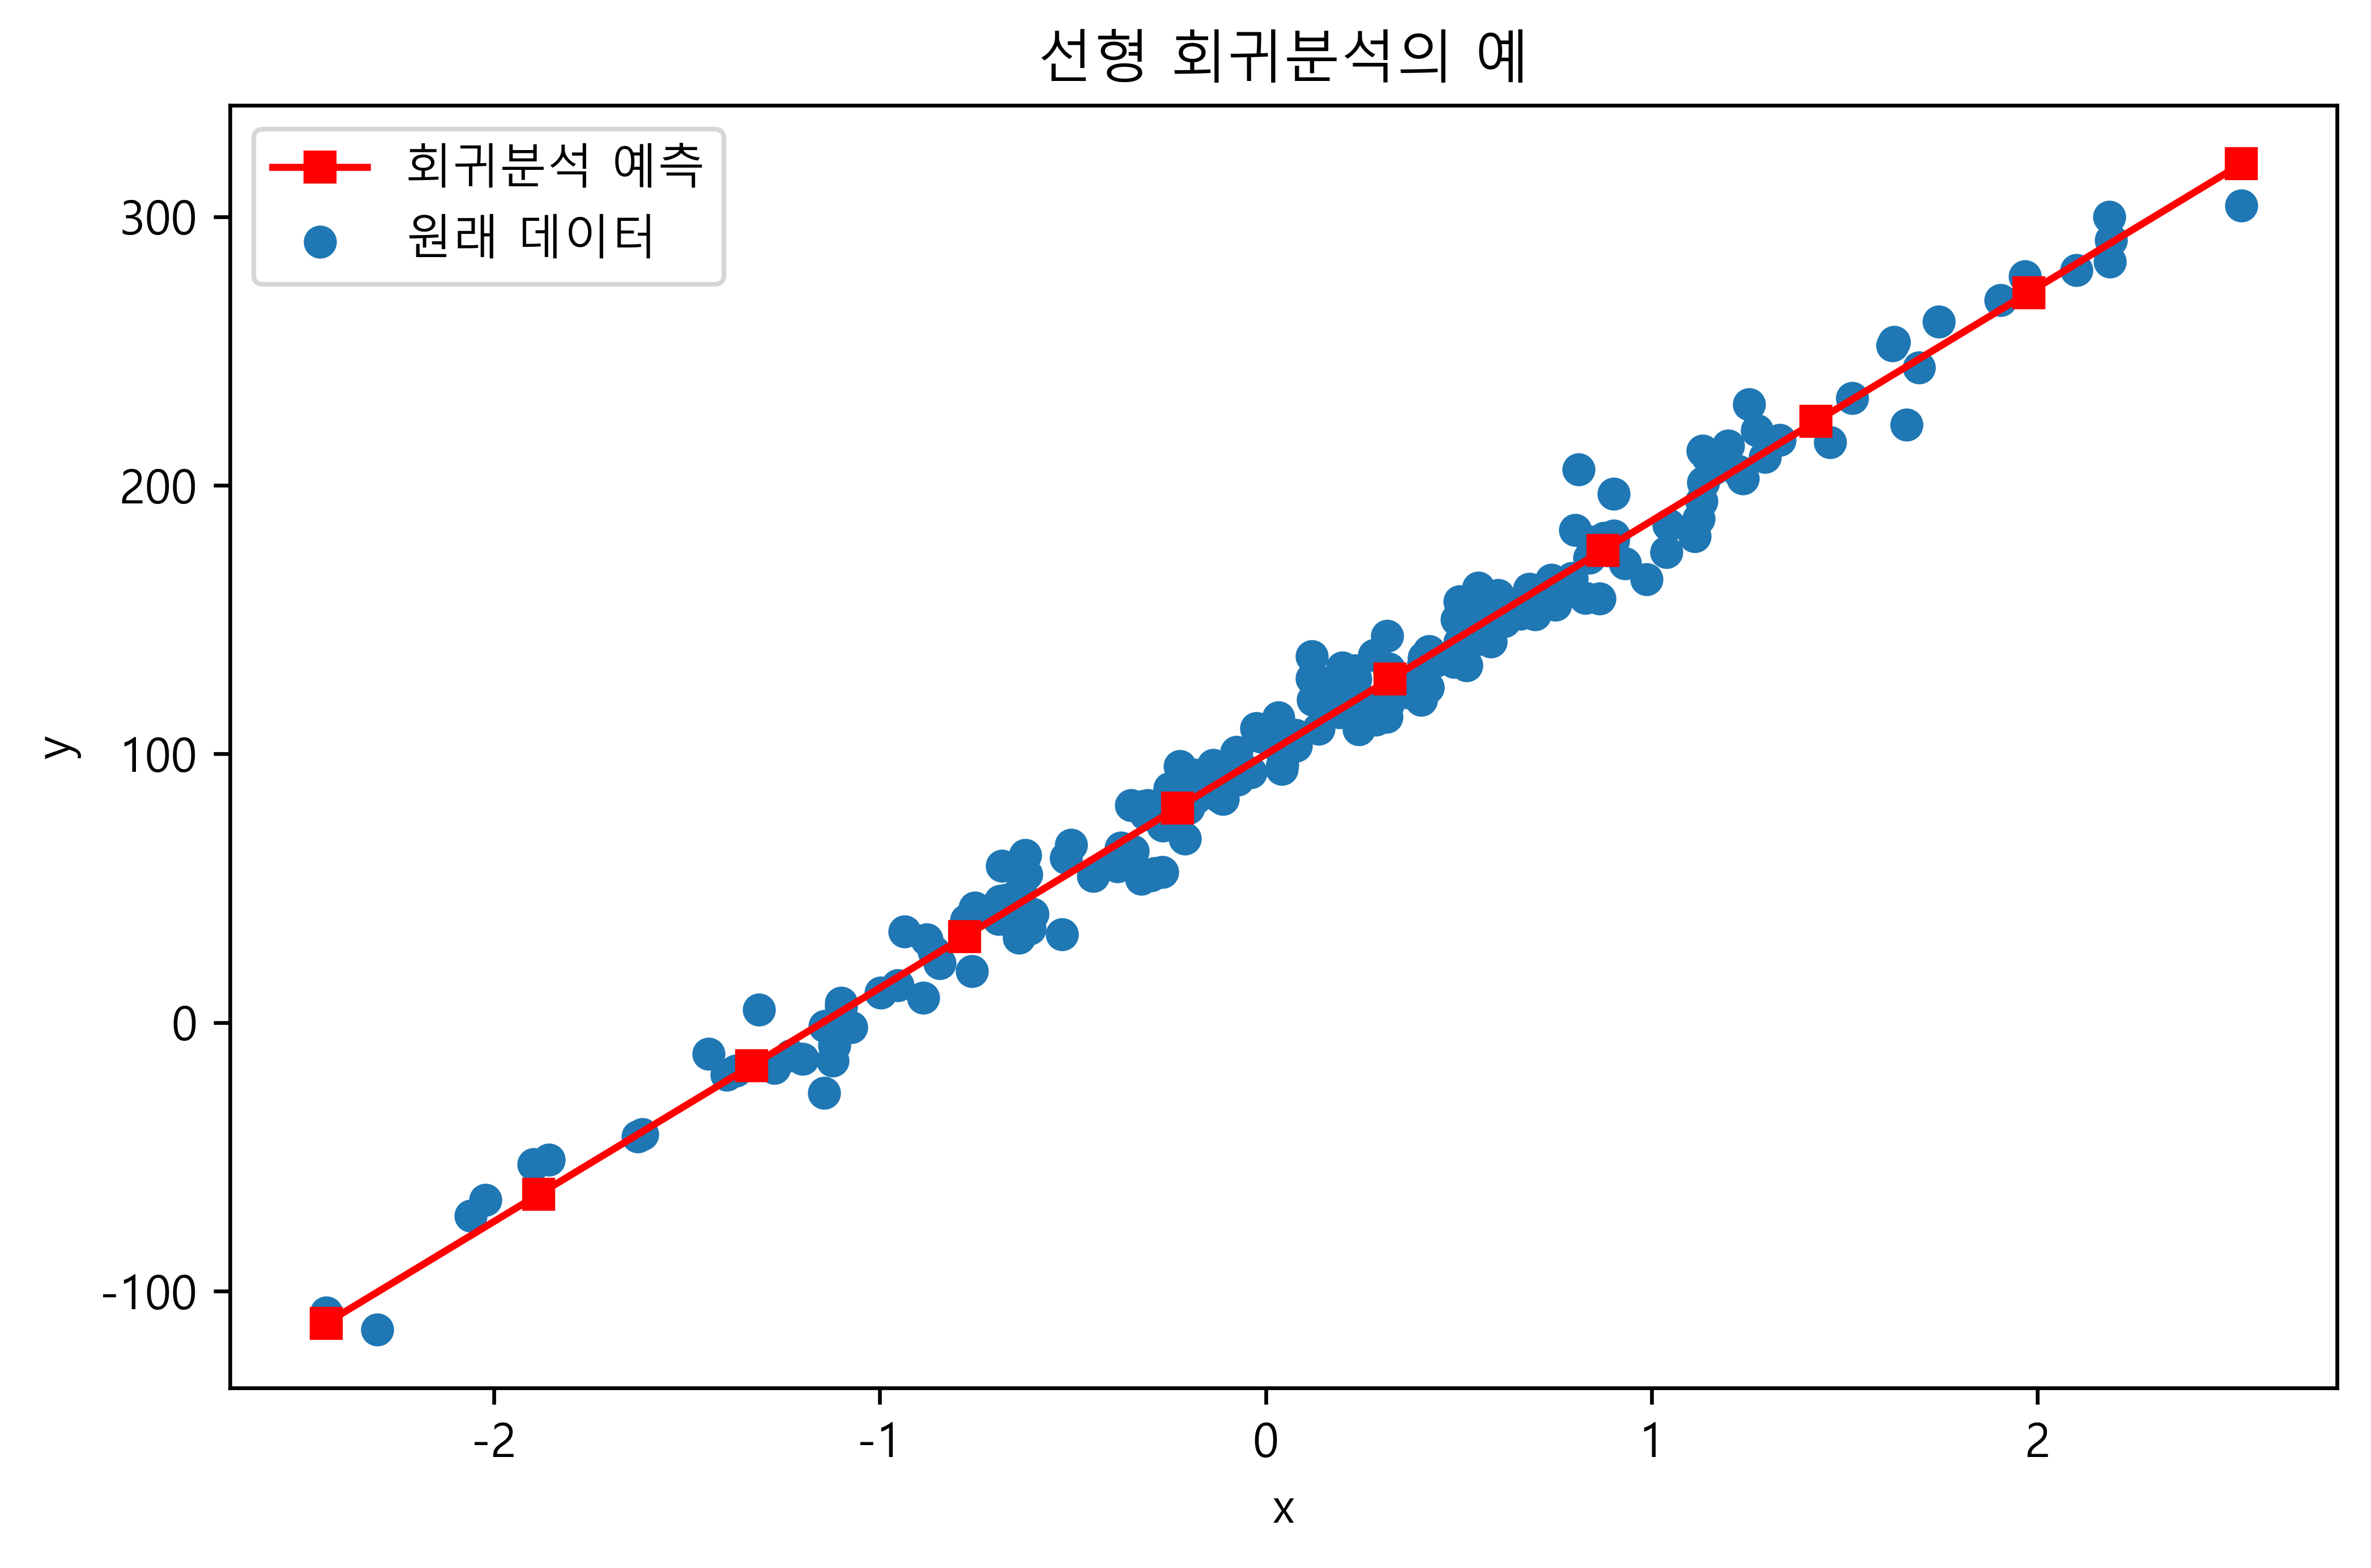

In [10]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new) # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

### scikit-learn 패키지를 사용한 선형 회귀분석 - LinearRegression 클래스

In [12]:
# 위 예제를 LinearRegression 클래스로 선형회귀를 하면 다음과 같다.
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


`predict` 메서드를 사용하면 새로운 $x_{new} 값에 대응하는 y$값을 예측할 수 있다. 

$x_{new}$ 값으로 2차원 배열을 써야한다는 점을 주의한다.

In [13]:
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

### statsmodel 패키지를 사용한 선형 회귀분석 - OLS 클래스

1. 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 
   
   상수항 결합은 하지 않아도 된다.


2. `OLS` 클래스 객체 생성.
   
   이 때 from_formula 메서드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열을 넣는다.
   
   data 인수로 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣는다.
   
   `model = OLS.from_formula(formula, data=df)`
   
   또는 독립변수만 있는 df `dfX`와 종속변수만 있는 df `dfy`를 인수로 넣어서 만들 수도 있다. 이때는 독립변수만 있는 df `dfX`가 상수항을 가지고 있어야 한다.
   
   `model = OLS(dfy, dfX)`
   

3. `fit` 메서드로 모형 추정. scikit-learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.

   `result = model.fit()`
   
   
4. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.

   `print(result.summary())`
   
   `y_ new = result.predict(x_new)`

In [15]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [16]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

In [17]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 19 May 2020   Prob (F-statistic):          8.17e-182
Time:                        15:09:40   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

### coef 열의 값이 가중치 값

In [20]:
result.predict({"x": [-2, -1, 0, 1, 2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.
- `params`: 가중치 벡터
- `resid`: 잔차 벡터

In [21]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

잔차 벡터의 형태는 다음과 같다

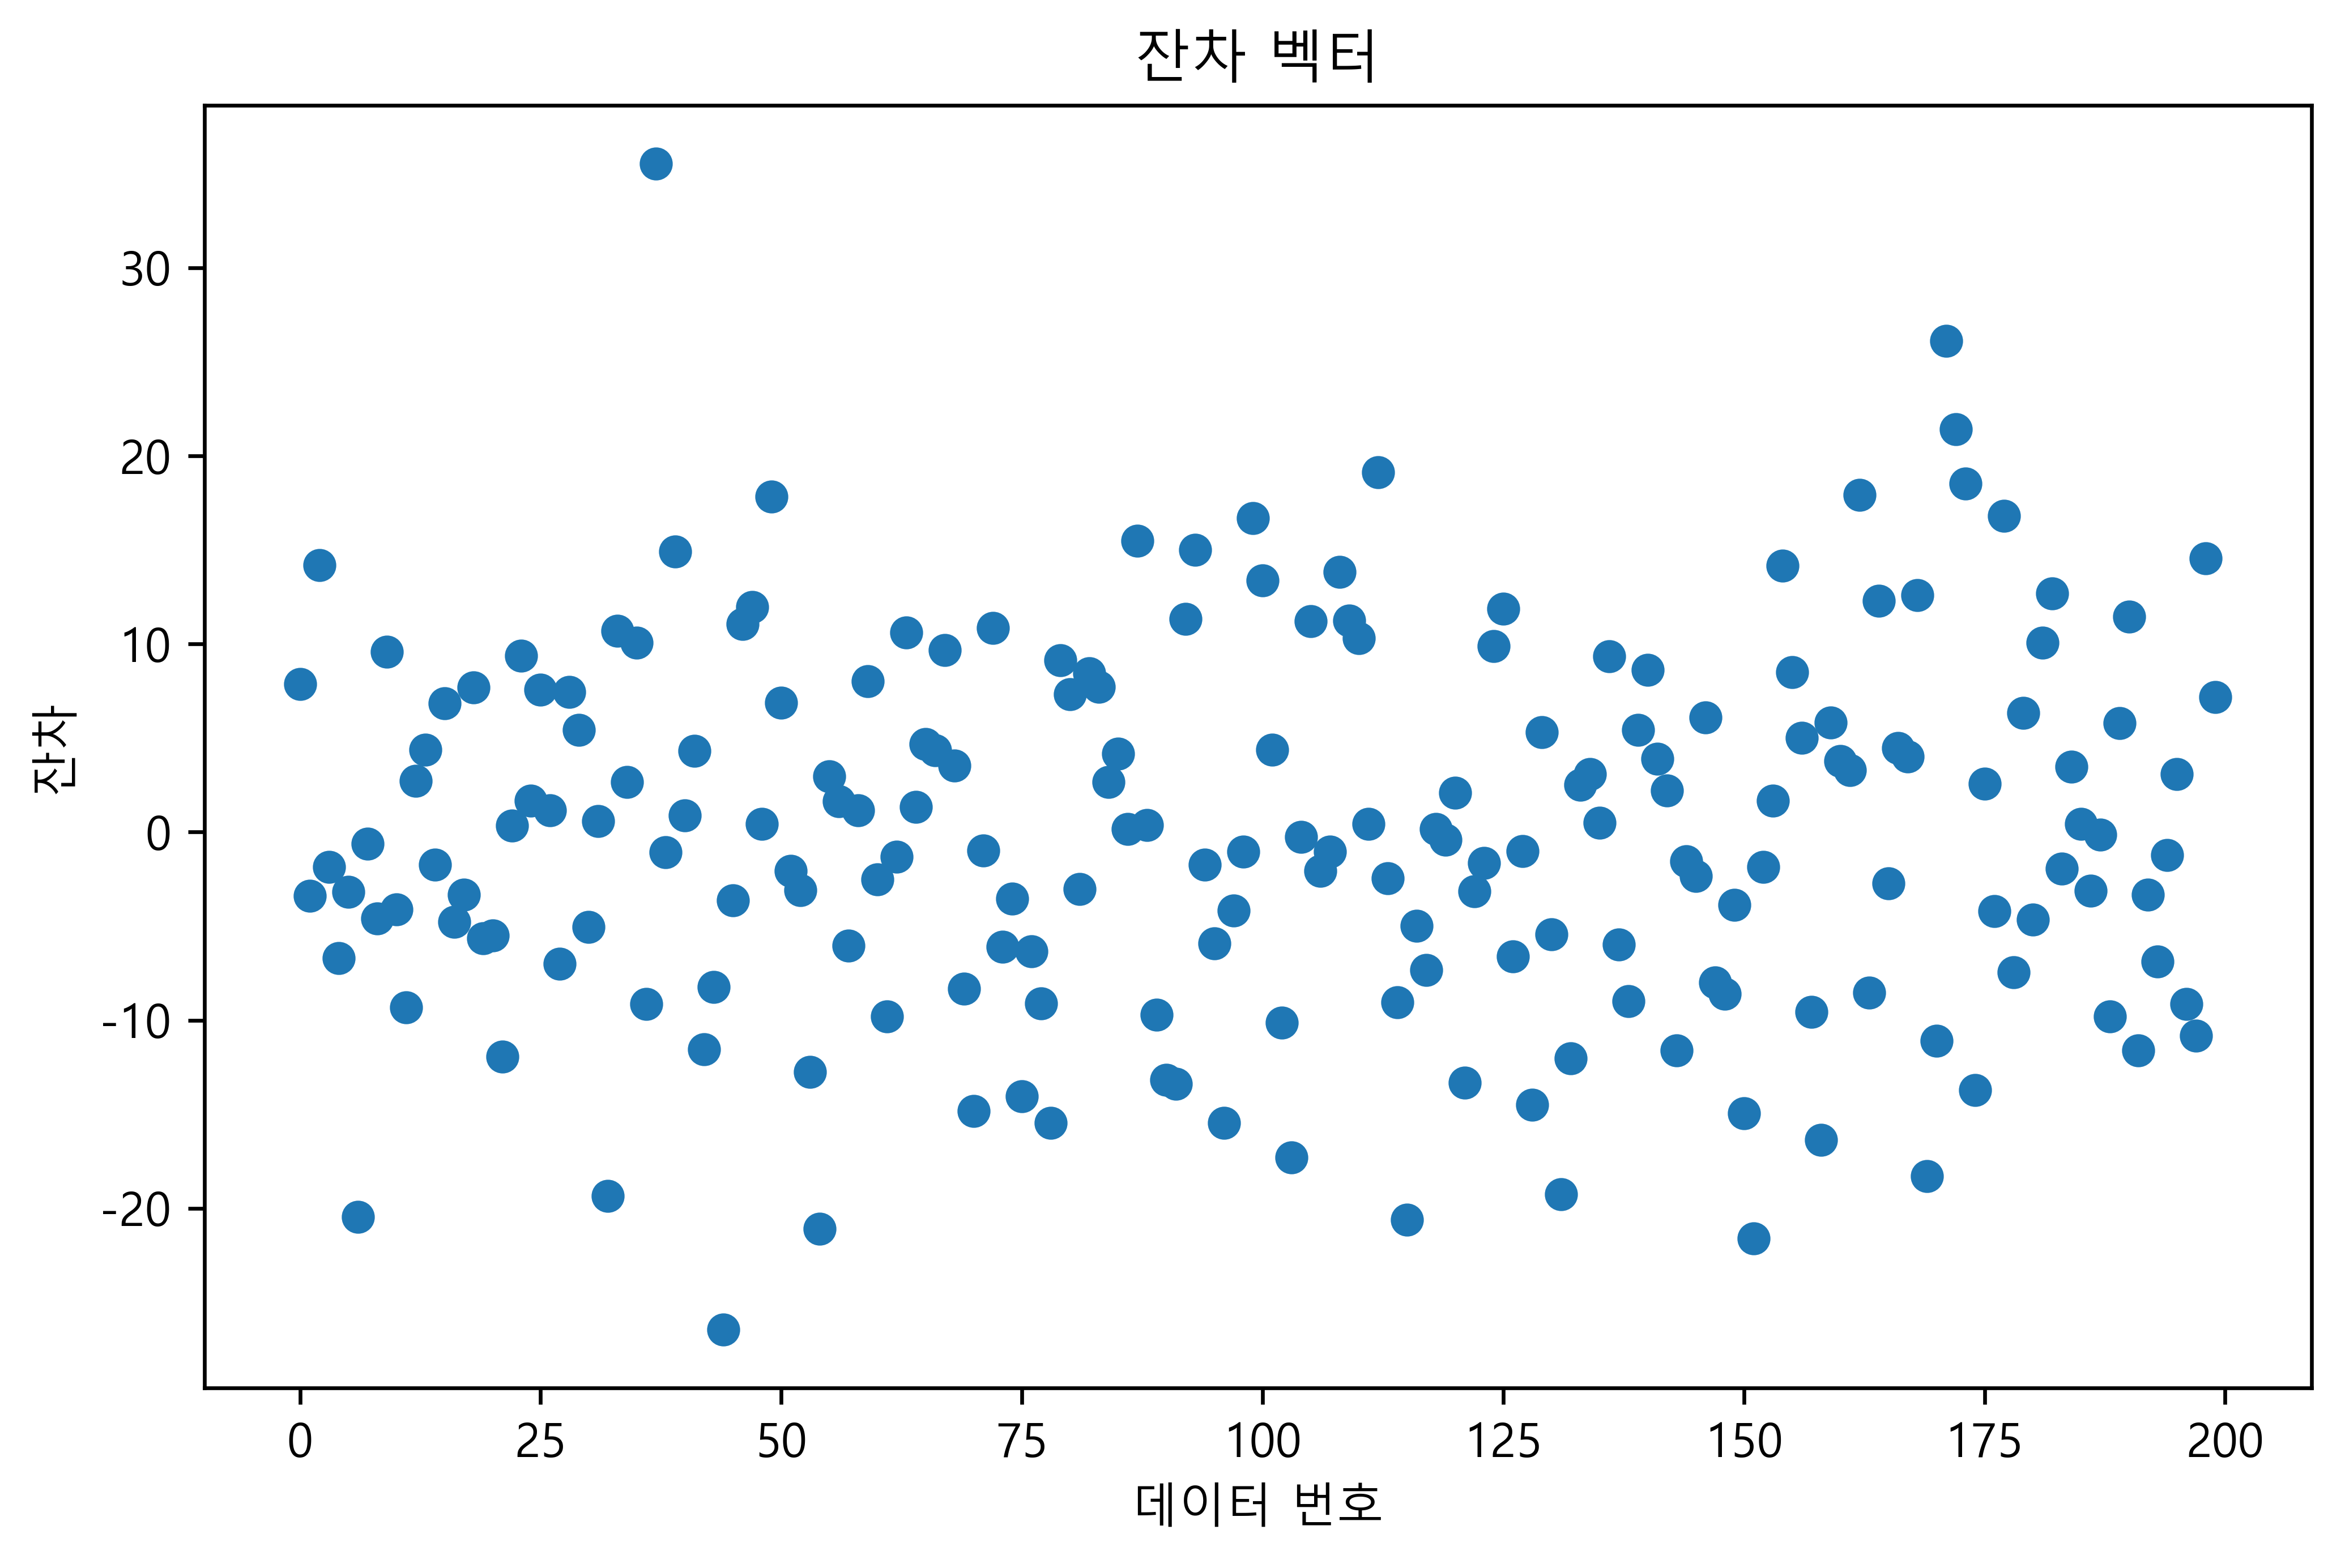

In [23]:
result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show()

직교방정식에서 나온 두 가지 성질이 성립하는지 살펴보자. 우선 잔차의 합을 구하면 0이라는 것을 알 수 있다.

In [24]:
# 잔차의 합 = 0
result.resid.sum()

6.572520305780927e-13

다음으로 x의 평균값을 넣으면 y의 평균값과 같은 값이 나온다는 것도 확인할 수 있다.

In [25]:
result.predict({"x": X0.mean()})

0    109.069351
dtype: float64

In [26]:
y.mean()

109.06935068170773

### 보스턴 집값 예측

In [28]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 19 May 2020   Prob (F-statistic):          6.72e-135
Time:                        15:17:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

따라서 보스턴 집값을 예측하는 식은 다음과 같다.

$y=36.4595−0.1080CRIM+0.0464ZN+0.0206INDUS+2.6867CHAS−17.7666NOX+3.8099RM+0.0007AGE−1.4756DIS+0.3060RAD−0.0123TAX−0.9527PTRATIO+0.0093B−0.5248LSTAT$
 
